In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
# Import RQ2 dataset
data = pd.read_csv('rq2_dataset.csv')
data.head()

App  popular  \
0  10 Best Foods for You        0   
1  10 Best Foods for You        0   
2  10 Best Foods for You        0   
3  10 Best Foods for You        0   
4  10 Best Foods for You        0   

                                   Translated_Review Sentiment  \
0  I like eat delicious food. That's I'm cooking ...  Positive   
1    This help eating healthy exercise regular basis  Positive   
2         Works great especially going grocery store  Positive   
3                                       Best idea us  Positive   
4                                           Best way  Positive   

   Sentiment_Polarity  Sentiment_Subjectivity sentiment_text  \
0                1.00                0.533333       Positive   
1                0.25                0.288462        Neutral   
2                0.40                0.875000       Positive   
3                1.00                0.300000       Positive   
4                1.00                0.300000       Positive   

  subjectivity_text                                  processed_reviews  
0        Subjective  like eat delicious food thats im cooking food ...  
1         Objective         help eating healthy exercise regular basis  
2        Subjective          work great especially going grocery store  
3         Objective                                        best idea u  
4         Objective                                           best way

In [3]:
# Drop empty rows of processed_reviews
data.dropna(inplace=True)

# Remove words with length < 3
more_stopwords = ['ive','itll','theyre']
data['sanitized'] = data['processed_reviews'].map(lambda x: ' '.join([i for i in x.split() if len(i) >= 3 and i not in more_stopwords]))

# Drop empty rows of sanitized
data.dropna(inplace=True)

In [4]:
# Split dataset into two groups, popular and non-popular
popular = data[data['popular'] == 1].copy()
print(popular.shape)
non_popular = data[data['popular'] == 0].copy()
print(non_popular.shape)

(20165, 10)
(15701, 10)


In [5]:
# Define functions
# Function for extracting td-idf 
def extract_tfidf(data, text_col_name):
    tfidf = TfidfVectorizer(
        min_df = 5,
        max_df = 0.95,
        max_features = 8000,
        stop_words = 'english'
    )
    tfidf.fit(data[text_col_name])
    text = tfidf.transform(data[text_col_name])
    return tfidf, text

# Function for finding most optimal number of clusters
def find_optimal_clusters(data, max_k):
    iters = range(2, max_k+1, 2)
    
    sse = []
    for k in iters:
        curr_sse = MiniBatchKMeans(n_clusters=k, init_size=1024, batch_size=2048, random_state=20).fit(data).inertia_
        sse.append(curr_sse)
        print(str(k), 'clusters:', str(round(curr_sse,4)))
        
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Number of Clusters')
    

# Function for running kmeans clustering and showing top keywords of each cluster
def get_top_keywords(data, num_clusters, labels, n_terms):
    clusters = MiniBatchKMeans(n_clusters=num_clusters, init_size=1024, batch_size=2048, random_state=20).fit_predict(data)
    df = pd.DataFrame(data.todense()).groupby(clusters).mean()
    
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([labels[t] for t in np.argsort(r)[-n_terms:]]))
        
    return clusters

# Popular

In [6]:
pop_tfidf, pop_text = extract_tfidf(popular, 'sanitized')
find_optimal_clusters(pop_text, 20)

2 clusters: 19441.3736
4 clusters: 19147.2671
6 clusters: 18990.3662
8 clusters: 18935.7684
10 clusters: 18730.8206
12 clusters: 18684.6627
14 clusters: 18597.875
16 clusters: 18442.7857
18 clusters: 18355.2295
20 clusters: 18346.5601


In [7]:
cluster_labels = get_top_keywords(pop_text, 10, pop_tfidf.get_feature_names(), 15)


Cluster 0
problem,need,phone,work,like,day,game,know,great,good,app,really,love,time,help

Cluster 1
really,screen,easy,issue,new,bad,problem,open,work,fix,app,awesome,time,update,great

Cluster 2
easy,pas,useful,work,luck,job,bad,like,time,love,far,app,really,game,good

Cluster 3
using,like,amazing,way,add,really,want,better,easy,need,make,good,work,app,love

Cluster 4
thanks,seen,camera,like,used,price,easy,good,thing,far,played,app,love,game,best

Cluster 5
addictive,way,money,like,make,great,really,good,playing,time,love,level,play,fun,game

Cluster 6
people,think,dont,great,lot,app,time,make,love,add,good,thing,really,game,like

Cluster 7
really,good,love,like,want,update,video,new,time,google,work,app,photo,useful,phone

Cluster 8
sign,business,star,liked,app,really,gold,thanks,like,kid,easy,love,good,game,nice

Cluster 9
received,app,childhood,good,reader,working,elegant,install,type,interesting,business,application,quality,game,excellent


In [8]:
popular['cluster_id'] = cluster_labels
print(popular['cluster_id'].value_counts())
popular.head()

3    9237
5    3553
1    2942
7    1471
6     907
4     641
2     524
0     513
8     295
9      82
Name: cluster_id, dtype: int64


App  popular                                  Translated_Review  \
194  11st        1                           Horrible ID verification   
195  11st        1  Easy even basic Korean. Searching English usua...   
196  11st        1                                               Cool   
197  11st        1  I do not collect it for a month, but I will no...   
198  11st        1  Top bar missing newest update. Hard shop can't...   

    Sentiment  Sentiment_Polarity  Sentiment_Subjectivity sentiment_text  \
194  Negative           -1.000000                1.000000       Negative   
195  Positive            0.236667                0.301667        Neutral   
196  Positive            0.350000                0.650000       Positive   
197   Neutral            0.000000                1.000000        Neutral   
198  Positive            0.002778                0.363889        Neutral   

    subjectivity_text                                  processed_reviews  \
194        Subjective                           horrible id verification   
195         Objective  easy even basic korean searching english usual...   
196        Subjective                                               cool   
197        Subjective         collect month refund said would call month   
198         Objective  top bar missing newest update hard shop cant s...   

                                             sanitized  cluster_id  
194                              horrible verification           3  
195  easy even basic korean searching english usual...           3  
196                                               cool           3  
197         collect month refund said would call month           3  
198  top bar missing newest update hard shop cant s...           1

In [18]:
popular.to_csv('rq2_popular_clusters_kmeans.csv', index=False)

# Non-Popular

In [9]:
non_pop_tfidf, non_pop_text = extract_tfidf(non_popular, 'sanitized')
find_optimal_clusters(non_pop_text, 20)

2 clusters: 14939.3829
4 clusters: 14676.1581
6 clusters: 14443.076
8 clusters: 14384.077
10 clusters: 14258.7631
12 clusters: 14127.6984
14 clusters: 13952.8156
16 clusters: 13973.2329
18 clusters: 13753.3993
20 clusters: 13756.6487


In [10]:
cluster_labels = get_top_keywords(non_pop_text, 6, non_pop_tfidf.get_feature_names(), 15)


Cluster 0
lot,phone,best,cute,good,make,great,playing,time,really,like,love,play,fun,game

Cluster 1
update,think,easy,pretty,job,useful,like,health,work,game,app,really,love,far,good

Cluster 2
price,good,food,need,help,time,like,use,way,idea,love,easy,work,app,great

Cluster 3
simple,work,idea,love,kid,helpful,super,easy,loved,like,good,really,game,app,nice

Cluster 4
better,great,make,awesome,update,really,need,best,good,easy,work,time,app,like,love

Cluster 5
dont,hard,like,need,make,thing,experience,stupid,really,good,game,far,time,app,bad


In [11]:
non_popular['cluster_id'] = cluster_labels
print(non_popular['cluster_id'].value_counts())
non_popular.head()

4    12944
0      841
2      833
1      573
3      324
5      186
Name: cluster_id, dtype: int64


App  popular  \
0  10 Best Foods for You        0   
1  10 Best Foods for You        0   
2  10 Best Foods for You        0   
3  10 Best Foods for You        0   
4  10 Best Foods for You        0   

                                   Translated_Review Sentiment  \
0  I like eat delicious food. That's I'm cooking ...  Positive   
1    This help eating healthy exercise regular basis  Positive   
2         Works great especially going grocery store  Positive   
3                                       Best idea us  Positive   
4                                           Best way  Positive   

   Sentiment_Polarity  Sentiment_Subjectivity sentiment_text  \
0                1.00                0.533333       Positive   
1                0.25                0.288462        Neutral   
2                0.40                0.875000       Positive   
3                1.00                0.300000       Positive   
4                1.00                0.300000       Positive   

  subjectivity_text                                  processed_reviews  \
0        Subjective  like eat delicious food thats im cooking food ...   
1         Objective         help eating healthy exercise regular basis   
2        Subjective          work great especially going grocery store   
3         Objective                                        best idea u   
4         Objective                                           best way   

                                           sanitized  cluster_id  
0  like eat delicious food thats cooking food cas...           4  
1         help eating healthy exercise regular basis           4  
2          work great especially going grocery store           2  
3                                          best idea           4  
4                                           best way           4

In [22]:
non_popular.to_csv('rq2_non_popular_clusters_kmeans.csv', index=False)

# Popular + Sentiments

## Popular Apps + Positive Reviews

In [12]:
pop_pos = popular[popular['sentiment_text'] == 'Positive']
print(pop_pos.shape)
pop_pos.head()

(6788, 11)


App  popular                                  Translated_Review  \
196  11st        1                                               Cool   
201  11st        1  I enjoying online shopping via 11st app. Perfect!   
202  11st        1                                        good enough   
205  11st        1  Is it sound like you want to clear Chrome and ...   
206  11st        1                                                 Ok   

    Sentiment  Sentiment_Polarity  Sentiment_Subjectivity sentiment_text  \
196  Positive            0.350000                0.650000       Positive   
201  Positive            0.750000                0.800000       Positive   
202  Positive            0.350000                0.550000       Positive   
205  Positive            0.283333                0.477778       Positive   
206  Positive            0.500000                0.500000       Positive   

    subjectivity_text                                  processed_reviews  \
196        Subjective                                               cool   
201        Subjective           enjoying online shopping via app perfect   
202        Subjective                                        good enough   
205         Objective  sound like want clear chrome pay android user ...   
206         Objective                                                 ok   

                                             sanitized  cluster_id  
196                                               cool           3  
201           enjoying online shopping via app perfect           3  
202                                        good enough           2  
205  sound like want clear chrome pay android user ...           3  
206                                                              3

In [13]:
pop_pos_tfidf, pop_pos_text = extract_tfidf(pop_pos, 'sanitized')
find_optimal_clusters(pop_pos_text, 20)

2 clusters: 6434.7435
4 clusters: 6225.3518
6 clusters: 6044.2362
8 clusters: 6005.0391
10 clusters: 5842.4994
12 clusters: 5794.0422
14 clusters: 5783.6793
16 clusters: 5664.552
18 clusters: 5714.6843
20 clusters: 5641.2854


In [14]:
cluster_labels = get_top_keywords(pop_pos_text, 8, pop_pos_tfidf.get_feature_names(), 15)


Cluster 0
need,make,phone,app,pas,like,killer,work,fun,love,game,play,good,great,time

Cluster 1
work,year,super,fun,dog,make,using,really,amazing,easy,thank,game,great,app,love

Cluster 2
working,price,game,easy,update,thanks,add,deal,helpful,really,minute,job,work,app,great

Cluster 3
simply,thing,editing,football,good,used,camera,price,seen,app,love,far,played,game,best

Cluster 4
purchase,feature,camera,thing,time,job,work,app,love,really,nice,far,like,game,good

Cluster 5
character,excellent,better,playing,really,easy,good,make,add,app,play,love,like,game,awesome

Cluster 6
way,cool,free,better,work,fun,really,amazing,love,great,easy,app,like,good,nice

Cluster 7
stable,place,tool,great,incredibly,nice,use,extremely,really,good,business,love,easy,app,useful


In [15]:
pop_pos['cluster_id'] = cluster_labels
print(pop_pos['cluster_id'].value_counts())
pop_pos.head()

6    4327
0     519
1     400
3     383
5     346
4     344
2     333
7     136
Name: cluster_id, dtype: int64


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


App  popular                                  Translated_Review  \
196  11st        1                                               Cool   
201  11st        1  I enjoying online shopping via 11st app. Perfect!   
202  11st        1                                        good enough   
205  11st        1  Is it sound like you want to clear Chrome and ...   
206  11st        1                                                 Ok   

    Sentiment  Sentiment_Polarity  Sentiment_Subjectivity sentiment_text  \
196  Positive            0.350000                0.650000       Positive   
201  Positive            0.750000                0.800000       Positive   
202  Positive            0.350000                0.550000       Positive   
205  Positive            0.283333                0.477778       Positive   
206  Positive            0.500000                0.500000       Positive   

    subjectivity_text                                  processed_reviews  \
196        Subjective                                               cool   
201        Subjective           enjoying online shopping via app perfect   
202        Subjective                                        good enough   
205         Objective  sound like want clear chrome pay android user ...   
206         Objective                                                 ok   

                                             sanitized  cluster_id  
196                                               cool           6  
201           enjoying online shopping via app perfect           6  
202                                        good enough           4  
205  sound like want clear chrome pay android user ...           6  
206                                                              6

In [28]:
pop_pos.to_csv('rq2_popular_positive_clusters_kmeans.csv', index=False)

## Popular Apps + Negative Reviews

In [16]:
pop_neg = popular[popular['sentiment_text'] == 'Negative']
print(pop_neg.shape)
pop_neg.head()

(1717, 11)


App  popular  \
194                             11st        1   
199                             11st        1   
200                             11st        1   
207                             11st        1   
318  1LINE – One Line with One Touch        1   

                                     Translated_Review Sentiment  \
194                           Horrible ID verification  Negative   
199                     There is nothing missing ~ !!!  Negative   
200  Refund takes long.. 3 days still received mone...  Negative   
207  I am trying to update every time but I do not ...  Negative   
318                                 amaze i'm addicted  Negative   

     Sentiment_Polarity  Sentiment_Subjectivity sentiment_text  \
194           -1.000000                1.000000       Negative   
199           -0.390625                0.050000       Negative   
200           -0.325000                0.650000       Negative   
207           -0.308333                0.458333       Negative   
318           -0.400000                0.600000       Negative   

    subjectivity_text                                  processed_reviews  \
194        Subjective                           horrible id verification   
199         Objective                                    nothing missing   
200        Subjective    refund take long day still received money crazy   
207         Objective  trying update every time stall still difficult...   
318        Subjective                                  amaze im addicted   

                                             sanitized  cluster_id  
194                              horrible verification           3  
199                                    nothing missing           3  
200    refund take long day still received money crazy           3  
207  trying update every time stall still difficult...           1  
318                                     amaze addicted           3

In [17]:
pop_neg_tfidf, pop_neg_text = extract_tfidf(pop_neg, 'sanitized')
find_optimal_clusters(pop_neg_text, 20)

2 clusters: 1640.2039
4 clusters: 1616.3488
6 clusters: 1585.491
8 clusters: 1565.1735
10 clusters: 1550.7346
12 clusters: 1536.6352
14 clusters: 1517.61
16 clusters: 1506.4344
18 clusters: 1498.4293
20 clusters: 1484.874


In [18]:
cluster_labels = get_top_keywords(pop_neg_text, 6, pop_neg_tfidf.get_feature_names(), 15)


Cluster 0
let,fix,stupid,terrible,horrible,annoying,update,work,suck,phone,time,slow,useless,app,worst

Cluster 1
fun,horrible,news,color,quite,slow,really,make,people,annoying,played,bit,boring,game,like

Cluster 2
candy,fix,hard,happens,die,fish,waste,impossible,star,difficult,stuck,play,time,game,level

Cluster 3
lost,like,suck,star,problem,update,terrible,start,stupid,playing,fix,time,worst,play,game

Cluster 4
make,good,puzzle,want,list,google,love,worst,work,worry,app,way,shopping,game,hate

Cluster 5
coin,awful,time,new,thats,second,make,player,lag,play,bank,online,update,game,bad


In [19]:
pop_neg['cluster_id'] = cluster_labels
print(pop_neg['cluster_id'].value_counts())
pop_neg.head()

0    933
3    343
1    145
5    110
4     95
2     91
Name: cluster_id, dtype: int64


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


App  popular  \
194                             11st        1   
199                             11st        1   
200                             11st        1   
207                             11st        1   
318  1LINE – One Line with One Touch        1   

                                     Translated_Review Sentiment  \
194                           Horrible ID verification  Negative   
199                     There is nothing missing ~ !!!  Negative   
200  Refund takes long.. 3 days still received mone...  Negative   
207  I am trying to update every time but I do not ...  Negative   
318                                 amaze i'm addicted  Negative   

     Sentiment_Polarity  Sentiment_Subjectivity sentiment_text  \
194           -1.000000                1.000000       Negative   
199           -0.390625                0.050000       Negative   
200           -0.325000                0.650000       Negative   
207           -0.308333                0.458333       Negative   
318           -0.400000                0.600000       Negative   

    subjectivity_text                                  processed_reviews  \
194        Subjective                           horrible id verification   
199         Objective                                    nothing missing   
200        Subjective    refund take long day still received money crazy   
207         Objective  trying update every time stall still difficult...   
318        Subjective                                  amaze im addicted   

                                             sanitized  cluster_id  
194                              horrible verification           0  
199                                    nothing missing           0  
200    refund take long day still received money crazy           0  
207  trying update every time stall still difficult...           0  
318                                     amaze addicted           0

In [34]:
pop_neg.to_csv('rq2_popular_negative_clusters_kmeans.csv', index=False)

## Popular Apps + Neutral Reviews

In [20]:
pop_neu = popular[popular['sentiment_text'] == 'Neutral']
print(pop_neu.shape)
pop_neu.head()

(11660, 11)


App  popular                                  Translated_Review  \
195  11st        1  Easy even basic Korean. Searching English usua...   
197  11st        1  I do not collect it for a month, but I will no...   
198  11st        1  Top bar missing newest update. Hard shop can't...   
203  11st        1         I switching gMarket Twice 11st's new face!   
204  11st        1                          forced full screen popups   

    Sentiment  Sentiment_Polarity  Sentiment_Subjectivity sentiment_text  \
195  Positive            0.236667                0.301667        Neutral   
197   Neutral            0.000000                1.000000        Neutral   
198  Positive            0.002778                0.363889        Neutral   
203  Positive            0.170455                0.454545        Neutral   
204  Positive            0.025000                0.375000        Neutral   

    subjectivity_text                                  processed_reviews  \
195         Objective  easy even basic korean searching english usual...   
197        Subjective         collect month refund said would call month   
198         Objective  top bar missing newest update hard shop cant s...   
203         Objective                   switching gmarket twice new face   
204         Objective                          forced full screen popups   

                                             sanitized  cluster_id  
195  easy even basic korean searching english usual...           3  
197         collect month refund said would call month           3  
198  top bar missing newest update hard shop cant s...           1  
203                   switching gmarket twice new face           3  
204                          forced full screen popups           3

In [21]:
pop_neu_tfidf, pop_neu_text = extract_tfidf(pop_neu, 'sanitized')
find_optimal_clusters(pop_neu_text, 20)

2 clusters: 11149.3473
4 clusters: 11105.6429
6 clusters: 11026.9011
8 clusters: 10962.3452
10 clusters: 10934.2281
12 clusters: 10893.3194
14 clusters: 10876.3648
16 clusters: 10818.011
18 clusters: 10798.4172
20 clusters: 10739.8836


In [22]:
cluster_labels = get_top_keywords(pop_neu_text, 8, pop_neu_tfidf.get_feature_names(), 15)


Cluster 0
new,used,option,day,video,google,app,account,want,open,make,add,need,phone,time

Cluster 1
using,use,free,love,make,time,simple,want,think,thing,easy,pay,good,app,really

Cluster 2
htc,issue,game,message,screen,app,version,time,phone,recent,fix,open,latest,new,update

Cluster 3
thing,money,addictive,nice,like,make,playing,really,great,time,good,play,fun,love,game

Cluster 4
using,open,play,work,solve,love,app,issue,update,working,star,time,game,fix,problem

Cluster 5
new,like,coin,make,life,love,hard,money,star,time,playing,fun,play,game,level

Cluster 6
great,google,screen,issue,video,used,try,need,fine,open,app,time,doesnt,phone,work

Cluster 7
app,fun,second,people,dont,need,great,love,lot,time,make,thing,really,game,like


In [23]:
pop_neu['cluster_id'] = cluster_labels
print(pop_neu['cluster_id'].value_counts())
pop_neu.head()

0    5111
3    2052
1    1107
2     809
5     798
7     683
6     626
4     474
Name: cluster_id, dtype: int64


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


App  popular                                  Translated_Review  \
195  11st        1  Easy even basic Korean. Searching English usua...   
197  11st        1  I do not collect it for a month, but I will no...   
198  11st        1  Top bar missing newest update. Hard shop can't...   
203  11st        1         I switching gMarket Twice 11st's new face!   
204  11st        1                          forced full screen popups   

    Sentiment  Sentiment_Polarity  Sentiment_Subjectivity sentiment_text  \
195  Positive            0.236667                0.301667        Neutral   
197   Neutral            0.000000                1.000000        Neutral   
198  Positive            0.002778                0.363889        Neutral   
203  Positive            0.170455                0.454545        Neutral   
204  Positive            0.025000                0.375000        Neutral   

    subjectivity_text                                  processed_reviews  \
195         Objective  easy even basic korean searching english usual...   
197        Subjective         collect month refund said would call month   
198         Objective  top bar missing newest update hard shop cant s...   
203         Objective                   switching gmarket twice new face   
204         Objective                          forced full screen popups   

                                             sanitized  cluster_id  
195  easy even basic korean searching english usual...           0  
197         collect month refund said would call month           0  
198  top bar missing newest update hard shop cant s...           2  
203                   switching gmarket twice new face           0  
204                          forced full screen popups           0

In [39]:
pop_neu.to_csv('rq2_popular_neutral_clusters_kmeans.csv', index=False)

# Non-Popular + Sentiments

## Non-Popular Apps + Positive Reviews

In [24]:
non_pop_pos = non_popular[non_popular['sentiment_text'] == 'Positive']
print(non_pop_pos.shape)
non_pop_pos.head()

(7117, 11)


App  popular  \
0  10 Best Foods for You        0   
2  10 Best Foods for You        0   
3  10 Best Foods for You        0   
4  10 Best Foods for You        0   
5  10 Best Foods for You        0   

                                   Translated_Review Sentiment  \
0  I like eat delicious food. That's I'm cooking ...  Positive   
2         Works great especially going grocery store  Positive   
3                                       Best idea us  Positive   
4                                           Best way  Positive   
5                                            Amazing  Positive   

   Sentiment_Polarity  Sentiment_Subjectivity sentiment_text  \
0                 1.0                0.533333       Positive   
2                 0.4                0.875000       Positive   
3                 1.0                0.300000       Positive   
4                 1.0                0.300000       Positive   
5                 0.6                0.900000       Positive   

  subjectivity_text                                  processed_reviews  \
0        Subjective  like eat delicious food thats im cooking food ...   
2        Subjective          work great especially going grocery store   
3         Objective                                        best idea u   
4         Objective                                           best way   
5        Subjective                                            amazing   

                                           sanitized  cluster_id  
0  like eat delicious food thats cooking food cas...           4  
2          work great especially going grocery store           2  
3                                          best idea           4  
4                                           best way           4  
5                                            amazing           4

In [25]:
non_pop_pos_tfidf, non_pop_pos_text = extract_tfidf(non_pop_pos, 'sanitized')
find_optimal_clusters(non_pop_pos_text, 20)

2 clusters: 6712.2263
4 clusters: 6305.9653
6 clusters: 6298.4416
8 clusters: 5989.2301
10 clusters: 5910.3751
12 clusters: 5841.1099
14 clusters: 5791.204
16 clusters: 5733.0845
18 clusters: 5708.367
20 clusters: 5680.2835


In [26]:
cluster_labels = get_top_keywords(non_pop_pos_text, 8, non_pop_pos_tfidf.get_feature_names(), 15)


Cluster 0
update,using,way,need,really,make,free,better,work,time,good,like,great,love,app

Cluster 1
helpful,fantastic,beautiful,great,loved,really,super,perfect,fun,excellent,useful,amazing,cool,good,awesome

Cluster 2
like,recipe,super,good,make,fast,quick,helpful,navigate,convenient,app,love,great,use,easy

Cluster 3
favorite,plus,really,cute,want,life,guy,great,playing,helpful,color,game,app,good,love

Cluster 4
apps,love,idea,information,work,useful,easy,helpful,super,like,good,loved,app,really,nice

Cluster 5
thanks,review,pretty,thats,apps,job,like,dating,work,think,useful,really,app,far,good

Cluster 6
food,come,work,need,thanks,like,way,great,thing,used,love,app,far,game,best

Cluster 7
business,say,price,far,way,good,time,deal,experience,information,love,idea,work,app,great


In [27]:
non_pop_pos['cluster_id'] = cluster_labels
print(non_pop_pos['cluster_id'].value_counts())
non_pop_pos.head()

0    2736
1    2125
2     475
7     441
6     411
5     398
3     295
4     236
Name: cluster_id, dtype: int64


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


App  popular  \
0  10 Best Foods for You        0   
2  10 Best Foods for You        0   
3  10 Best Foods for You        0   
4  10 Best Foods for You        0   
5  10 Best Foods for You        0   

                                   Translated_Review Sentiment  \
0  I like eat delicious food. That's I'm cooking ...  Positive   
2         Works great especially going grocery store  Positive   
3                                       Best idea us  Positive   
4                                           Best way  Positive   
5                                            Amazing  Positive   

   Sentiment_Polarity  Sentiment_Subjectivity sentiment_text  \
0                 1.0                0.533333       Positive   
2                 0.4                0.875000       Positive   
3                 1.0                0.300000       Positive   
4                 1.0                0.300000       Positive   
5                 0.6                0.900000       Positive   

  subjectivity_text                                  processed_reviews  \
0        Subjective  like eat delicious food thats im cooking food ...   
2        Subjective          work great especially going grocery store   
3         Objective                                        best idea u   
4         Objective                                           best way   
5        Subjective                                            amazing   

                                           sanitized  cluster_id  
0  like eat delicious food thats cooking food cas...           6  
2          work great especially going grocery store           0  
3                                          best idea           6  
4                                           best way           6  
5                                            amazing           1

In [45]:
non_pop_pos.to_csv('rq2_non_popular_positive_clusters_kmeans.csv', index=False)

## Non-Popular Apps + Negative Reviews

In [28]:
non_pop_neg = non_popular[non_popular['sentiment_text'] == 'Negative']
print(non_pop_neg.shape)
non_pop_neg.head()

(1214, 11)


App  popular  \
29   10 Best Foods for You        0   
82   10 Best Foods for You        0   
92   10 Best Foods for You        0   
126  10 Best Foods for You        0   
179  10 Best Foods for You        0   

                                     Translated_Review Sentiment  \
29                  No recipe book Unable recipe book.  Negative   
82                                   Crap Doesn't work  Negative   
92   Boring. I thought actually just texts that's i...  Negative   
126                 No recipe book Unable recipe book.  Negative   
179                                  Crap Doesn't work  Negative   

     Sentiment_Polarity  Sentiment_Subjectivity sentiment_text  \
29               -0.500                   0.500       Negative   
82               -0.800                   0.800       Negative   
92               -0.325                   0.475       Negative   
126              -0.500                   0.500       Negative   
179              -0.800                   0.800       Negative   

    subjectivity_text                                 processed_reviews  \
29          Objective                    recipe book unable recipe book   
82         Subjective                                  crap doesnt work   
92          Objective  boring thought actually text thats poor old text   
126         Objective                    recipe book unable recipe book   
179        Subjective                                  crap doesnt work   

                                            sanitized  cluster_id  
29                     recipe book unable recipe book           4  
82                                   crap doesnt work           4  
92   boring thought actually text thats poor old text           4  
126                    recipe book unable recipe book           4  
179                                  crap doesnt work           4

2 clusters: 1153.2093
4 clusters: 1094.7488
6 clusters: 1069.6405
8 clusters: 1060.362
10 clusters: 1029.5615
12 clusters: 1004.1939
14 clusters: 995.0301
16 clusters: 955.3021
18 clusters: 959.4966
20 clusters: 951.1026


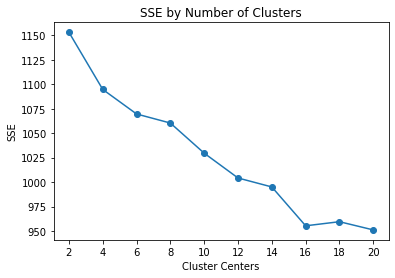

In [29]:
non_pop_neg_tfidf, non_pop_neg_text = extract_tfidf(non_pop_neg, 'sanitized')
find_optimal_clusters(non_pop_neg_text, 20)

In [30]:
cluster_labels = get_top_keywords(non_pop_neg_text, 12, non_pop_neg_tfidf.get_feature_names(), 15)


Cluster 0
way,time,want,good,load,disappointing,wrong,work,hard,horrible,boring,terrible,annoying,suck,fake

Cluster 1
screen,news,single,connect,image,list,search,log,update,work,completely,app,flight,message,useless

Cluster 2
people,message,fact,game,terrible,loading,tired,friend,time,pay,total,abc,distance,app,hate

Cluster 3
work,time,thats,screen,watch,turn,let,number,annoying,think,trying,make,run,disappointed,phone

Cluster 4
buy,email,really,annoying,used,add,balance,bitcoin,dont,send,pay,food,gift,like,card

Cluster 5
website,press,truly,working,play,update,used,episode,open,bank,order,crash,seen,install,worst

Cluster 6
say,bad,data,register,total,review,horrible,work,install,worst,dont,fake,terrible,time,waste

Cluster 7
work,boring,money,think,world,stop,played,open,bad,need,time,like,playing,play,game

Cluster 8
issue,book,horrible,google,let,dont,log,password,information,install,account,login,unable,awful,app

Cluster 9
think,thought,photo,player,thats,world,camera,game

In [31]:
non_pop_neg['cluster_id'] = cluster_labels
print(non_pop_neg['cluster_id'].value_counts())
non_pop_neg.head()

0     543
8     109
7      84
2      71
9      66
3      62
4      59
6      57
5      53
1      49
10     34
11     27
Name: cluster_id, dtype: int64


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


App  popular  \
29   10 Best Foods for You        0   
82   10 Best Foods for You        0   
92   10 Best Foods for You        0   
126  10 Best Foods for You        0   
179  10 Best Foods for You        0   

                                     Translated_Review Sentiment  \
29                  No recipe book Unable recipe book.  Negative   
82                                   Crap Doesn't work  Negative   
92   Boring. I thought actually just texts that's i...  Negative   
126                 No recipe book Unable recipe book.  Negative   
179                                  Crap Doesn't work  Negative   

     Sentiment_Polarity  Sentiment_Subjectivity sentiment_text  \
29               -0.500                   0.500       Negative   
82               -0.800                   0.800       Negative   
92               -0.325                   0.475       Negative   
126              -0.500                   0.500       Negative   
179              -0.800                   0.800       Negative   

    subjectivity_text                                 processed_reviews  \
29          Objective                    recipe book unable recipe book   
82         Subjective                                  crap doesnt work   
92          Objective  boring thought actually text thats poor old text   
126         Objective                    recipe book unable recipe book   
179        Subjective                                  crap doesnt work   

                                            sanitized  cluster_id  
29                     recipe book unable recipe book           8  
82                                   crap doesnt work           0  
92   boring thought actually text thats poor old text           0  
126                    recipe book unable recipe book           8  
179                                  crap doesnt work           0

In [50]:
non_pop_neg.to_csv('rq2_non_popular_negative_clusters_kmeans.csv', index=False)

## Non-Popular Apps + Neutral Reviews

In [32]:
non_pop_neu = non_popular[non_popular['sentiment_text'] == 'Neutral']
print(non_pop_neu.shape)
non_pop_neu.head()

(7370, 11)


App  popular  \
1   10 Best Foods for You        0   
6   10 Best Foods for You        0   
7   10 Best Foods for You        0   
9   10 Best Foods for You        0   
19  10 Best Foods for You        0   

                                    Translated_Review Sentiment  \
1     This help eating healthy exercise regular basis  Positive   
6                                Looking forward app,   Neutral   
7               It helpful site ! It help foods get !   Neutral   
9   Useful information The amount spelling errors ...  Positive   
19                                         God health   Neutral   

    Sentiment_Polarity  Sentiment_Subjectivity sentiment_text  \
1                 0.25                0.288462        Neutral   
6                 0.00                0.000000        Neutral   
7                 0.00                0.000000        Neutral   
9                 0.20                0.100000        Neutral   
19                0.00                0.000000        Neutral   

   subjectivity_text                                  processed_reviews  \
1          Objective         help eating healthy exercise regular basis   
6          Objective                                looking forward app   
7          Objective                         helpful site help food get   
9          Objective  useful information amount spelling error quest...   
19         Objective                                         god health   

                                            sanitized  cluster_id  
1          help eating healthy exercise regular basis           4  
6                                 looking forward app           4  
7                          helpful site help food get           4  
9   useful information amount spelling error quest...           4  
19                                         god health           4

2 clusters: 6993.9787
4 clusters: 6897.4907
6 clusters: 6848.3328
8 clusters: 6893.1162
10 clusters: 6756.712
12 clusters: 6698.7201
14 clusters: 6737.6451
16 clusters: 6851.9517
18 clusters: 6618.7611
20 clusters: 6587.0868


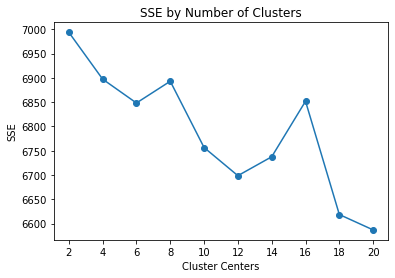

In [33]:
non_pop_neu_tfidf, non_pop_neu_text = extract_tfidf(non_pop_neu, 'sanitized')
find_optimal_clusters(non_pop_neu_text, 20)

In [34]:
cluster_labels = get_top_keywords(non_pop_neu_text, 12, non_pop_neu_tfidf.get_feature_names(), 15)


Cluster 0
open,say,let,working,people,make,way,love,know,help,really,like,want,helpful,app

Cluster 1
problem,make,cute,amazing,playing,time,like,really,nice,great,good,play,fun,love,game

Cluster 2
wont,crashing,android,used,fix,great,screen,app,try,update,open,notification,time,doesnt,work

Cluster 3
thing,balance,make,time,used,better,like,version,year,app,add,good,card,new,update

Cluster 4
problem,data,want,say,using,minute,like,money,long,open,day,app,dont,waste,time

Cluster 5
better,wish,offline,looking,far,used,color,tinder,thing,know,feature,lot,app,really,like

Cluster 6
sign,facebook,occurred,let,email,time,login,create,bank,password,getting,log,message,error,account

Cluster 7
second,trade,facebook,work,continues,update,app,single,fix,open,try,constantly,time,log,crash

Cluster 8
update,used,make,got,working,time,number,android,using,open,app,work,fix,problem,phone

Cluster 9
app,work,search,love,add,great,log,macro,like,item,track,database,easy,calorie,food

Cluster 10
d

In [35]:
non_pop_neu['cluster_id'] = cluster_labels
print(non_pop_neu['cluster_id'].value_counts())
non_pop_neu.head()

0     3811
3      816
1      459
2      376
4      368
8      321
11     298
6      262
5      212
7      173
10     137
9      137
Name: cluster_id, dtype: int64


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


App  popular  \
1   10 Best Foods for You        0   
6   10 Best Foods for You        0   
7   10 Best Foods for You        0   
9   10 Best Foods for You        0   
19  10 Best Foods for You        0   

                                    Translated_Review Sentiment  \
1     This help eating healthy exercise regular basis  Positive   
6                                Looking forward app,   Neutral   
7               It helpful site ! It help foods get !   Neutral   
9   Useful information The amount spelling errors ...  Positive   
19                                         God health   Neutral   

    Sentiment_Polarity  Sentiment_Subjectivity sentiment_text  \
1                 0.25                0.288462        Neutral   
6                 0.00                0.000000        Neutral   
7                 0.00                0.000000        Neutral   
9                 0.20                0.100000        Neutral   
19                0.00                0.000000        Neutral   

   subjectivity_text                                  processed_reviews  \
1          Objective         help eating healthy exercise regular basis   
6          Objective                                looking forward app   
7          Objective                         helpful site help food get   
9          Objective  useful information amount spelling error quest...   
19         Objective                                         god health   

                                            sanitized  cluster_id  
1          help eating healthy exercise regular basis           0  
6                                 looking forward app           0  
7                          helpful site help food get           9  
9   useful information amount spelling error quest...           6  
19                                         god health           0

In [55]:
non_pop_neu.to_csv('rq2_non_popular_neutral_clusters_kmeans.csv', index=False)